In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_categories',500)
pd.set_option('max_columns',500)
pd.set_option('max_colwidth',500)
pd.set_option('max_info_rows',500)
pd.set_option('max_rows',500)
pd.set_option('max_seq_items',500)

In [92]:
data_intrusion = pd.read_csv("Intrusion_Detection/IDS_train.csv")

In [93]:
data_intrusion.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,22,1420155,37,46,2634,7062,408,0,71.189189,103.527194,976,0,153.521739,306.211818,6827.423767,58.44432474,1.731896e+04,1.061066e+05,953414,0,1420155,39448.75,1.682052e+05,995622,3,466571,10368.24444,23078.02737,106355,1,0,0,0,0,764,944,26.053494,32.390831,0,976,115.428571,239.421657,5.732273e+04,0,0,0,1,0,0,0,0,1,116.819277,71.189189,153.521739,764,0,0,0,0,0,0,37,2634,46,7062,8192,245,35,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,80,63122325,7,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0.110895788,1.050000e+07,1.190000e+07,32100000,998805,63100000,10500000.00,1.190000e+07,32100000,998805,0,0.00000,0.00000,0,0,0,0,0,0,280,0,0.110896,0.000000,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,280,0,0,0,0,0,0,7,0,0,0,29200,-1,0,40,7010762.0,0.0,7010762,7010762,18700000.0,12200000.0,32100000,8015920,DoS Slowhttptest
2,2,80,85039076,6,6,347,11595,347,0,57.833333,141.662157,5792,0,1932.500000,2181.008184,140.42955969999997,0.141111599,7.730825e+06,2.560000e+07,84900000,1,84900000,17000000.00,3.800000e+07,84900000,1,153411,30682.20000,60418.07800,138145,45,0,0,0,0,200,200,0.070556,0.070556,0,5792,918.615385,1716.139686,2.945135e+06,0,0,0,0,1,0,0,0,1,995.166667,57.833333,1932.500000,200,0,0,0,0,0,0,6,347,6,11595,251,235,1,32,4.0,0.0,4,4,84900000.0,0.0,84900000,84900000,DoS Hulk
3,3,443,5379977,5,1,135,46,46,6,27.000000,20.124612,46,46,46.000000,0.000000,33.6432665,1.115246403,1.075995e+06,2.342474e+06,5266022,4,5379977,1344994.25,2.614504e+06,5266022,4,0,0.00000,0.00000,0,0,1,0,0,0,100,20,0.929372,0.185874,6,46,32.428571,18.866700,3.559524e+02,0,1,0,0,1,0,0,0,0,37.833333,27.000000,46.000000,100,0,0,0,0,0,0,5,135,1,46,258,360,4,20,109172.0,0.0,109172,109172,5266022.0,0.0,5266022,5266022,BENIGN
4,4,80,84220258,8,5,326,11595,320,0,40.750000,112.853571,8688,0,2319.000000,3774.237539,141.5455175,0.154357162,7.018355e+06,2.430000e+07,84100000,1,84100000,12000000.00,3.180000e+07,84100000,1,146592,36648.00000,64691.87929,133266,190,0,0,0,0,252,168,0.094989,0.059368,0,8688,851.500000,2382.952040,5.678460e+06,0,0,0,0,1,0,0,0,0,917.000000,40.750000,2319.000000,252,0,0,0,0,0,0,8,326,5,11595,274,235,2,20,1976.0,0.0,1976,1976,84100000.0,0.0,84100000,84100000,DoS Hulk


In [94]:
## summary of the data !!
data_intrusion.describe(include= 'all')

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,129879.000000,129879.000000,1.298790e+05,129879.000000,129879.000000,1.298790e+05,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129679,129879,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,129879.000000,129879.0,129879.0,129879.0,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.0,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,129879.0,129879.0,129879.0,129879.0,129879.0,129879.0,129879.000000,1.298790e+05,129879.000000,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,129879
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91162,81802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,666666.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11799,5350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82428
mean,64939.000000,5714.908638,2.808619e+07,8.522710,8.925400,5.393826e+02,1.417065e+04,233.075054,15.097190,60.403257,82.642752,1660.832190,33.744624,552.530111,658.590425,NaN,NaN,2.520805e+06,6.865177e+06,2.295862e+07,2.320982e+05,2.783185e+07,5.100468e+06,9.036617e+06,2.286408e+07,1.052415e+06,1.388223e+07,2.639427e+06,3.520018e+06,9.291021e+06,9.185276e+05,0.042324,0.0,0.0,0.0,2.199637e+02,2.236889e+02,9.588483e+04,4.229337e+03,13.700313,1723.988682,278.364947,523.223824,8.874053e+05,0.097137,0.042324,0.000331,0.191817,0.419075,0.066400,0.0,0.000331,0.555902,305.776309,60.403257,552.530111,2.199637e+02,0.0,0.0,0.0,0.0,0.0,0.0,8.522710,5.393826e+02,8.925400,1.41

In [95]:
null_columns=data_intrusion.columns[data_intrusion.isnull().any()]
data_intrusion[null_columns].isnull().sum()

Flow Bytes/s    200
dtype: int64

In [96]:
data_intrusion.dropna(how = 'any', inplace=True)

In [97]:
null_columns=data_intrusion.columns[data_intrusion.isnull().any()]
data_intrusion[null_columns].isnull().sum()

Series([], dtype: float64)

In [98]:
data_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129679 entries, 0 to 129878
Data columns (total 80 columns):
ID                             int64
Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   object
Flow Packets/s                 object
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   float64
Fwd IAT Std           

In [99]:
data_intrusion['Flow Bytes/s'] = data_intrusion['Flow Bytes/s'].astype(float).round(0)
data_intrusion['Flow Packets/s'] = data_intrusion['Flow Packets/s'].astype(float).round(0)

In [100]:
data_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129679 entries, 0 to 129878
Data columns (total 80 columns):
ID                             int64
Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   float64
Flow Packets/s                 float64
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   float64
Fwd IAT Std         

In [101]:
data_intrusion.replace([np.inf, -np.inf], np.nan, inplace=True)

In [102]:
null_columns=data_intrusion.columns[data_intrusion.isnull().any()]
data_intrusion[null_columns].isnull().sum()

Flow Bytes/s      67
Flow Packets/s    67
dtype: int64

In [103]:
data_intrusion.dropna(how = 'any', inplace=True)

In [104]:
null_columns=data_intrusion.columns[data_intrusion.isnull().any()]
data_intrusion[null_columns].isnull().sum()

Series([], dtype: float64)

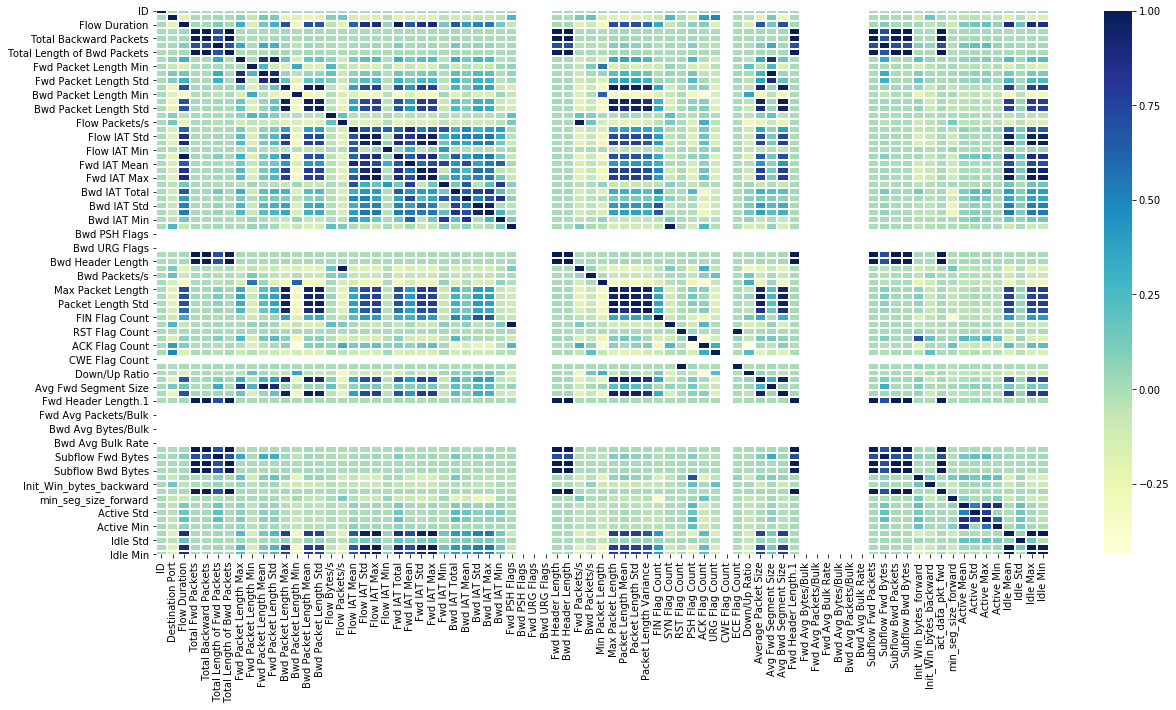

In [105]:
corrmat = data_intrusion.corr()
 
f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 1)

In [106]:
data_intrusion.shape

(129612, 80)

In [107]:
data_intrusion['Label'].value_counts()

BENIGN              82347
DoS Hulk            43223
DoS GoldenEye        1967
DoS slowloris        1057
DoS Slowhttptest     1018
Name: Label, dtype: int64

In [108]:
data_label = data_intrusion.Label
data_intrusion.drop(['Label','ID'] , axis=1 , inplace=True)

In [109]:
# selecting the columns for changing the data types to "int"

col = [key for key in dict(data_intrusion.dtypes) if dict(data_intrusion.dtypes)[key] in ['float64']]

In [110]:
data_intrusion[col] = data_intrusion[col].applymap(np.int64)

In [111]:
data_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129612 entries, 0 to 129878
Data columns (total 78 columns):
Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         int64
Fwd Packet Length Std          int64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         int64
Bwd Packet Length Std          int64
Flow Bytes/s                   int64
Flow Packets/s                 int64
Flow IAT Mean                  int64
Flow IAT Std                   int64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   int64
Fwd IAT Std                    int64
Fwd IAT Max                    int64
F

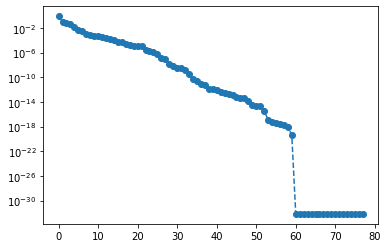

In [112]:
## using PCA for dimensionality reduction !! 

from sklearn.decomposition import PCA

pca_trafo = PCA().fit(data_intrusion)

plt.semilogy(pca_trafo.explained_variance_ratio_, '--o')

## from the below plot we can see that that by one principal component , we can
## explain most of the variance from the data.

## X-axis is the principal component and Y-axis is the explained variance !! 

In [113]:
## considering all my options so including all the features and checking how the variance ratio is ??

pca = PCA(n_components=60)  

pca.fit(data_intrusion)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)


[77.95 87.24 93.4  97.29 98.91 99.35 99.64 99.74 99.8  99.86 99.9  99.93
 99.95 99.96 99.97 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98
 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98
 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98
 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98]


In [114]:
print(var) ## we can see for which features that we got from PCA is giving maximum variance !! 

[7.79475030e-01 9.29497851e-02 6.16251088e-02 3.88552056e-02
 1.61762345e-02 4.39369763e-03 2.91259323e-03 1.02280819e-03
 6.09115637e-04 5.52503448e-04 4.49347884e-04 3.36257017e-04
 2.03871718e-04 1.44284326e-04 1.00361653e-04 6.26144761e-05
 4.98736226e-05 2.26068801e-05 1.65139548e-05 1.30889036e-05
 1.15476078e-05 1.05115899e-05 2.59389086e-06 2.16335716e-06
 1.37726983e-06 6.78961523e-07 1.14048906e-07 8.02926560e-08
 1.55721623e-08 7.11614642e-09 3.26754478e-09 2.74975266e-09
 1.56697908e-09 3.48312414e-10 5.56398102e-11 2.40029690e-11
 9.53770945e-12 5.93087097e-12 1.44093113e-12 1.22406786e-12
 7.33087057e-13 4.44983366e-13 2.99651307e-13 1.79943145e-13
 1.25484990e-13 5.45630839e-14 4.12905092e-14 3.71430739e-14
 1.29049952e-14 3.46921924e-15 2.68242418e-15 2.23227696e-15
 4.00230502e-16 1.25937138e-17 6.68162386e-18 4.16239596e-18
 2.60262216e-18 1.91097313e-18 7.88310411e-19 4.36049508e-20]


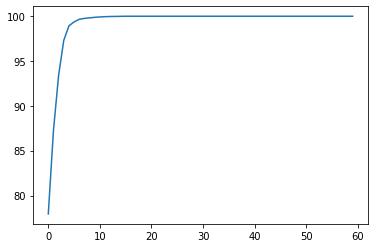

In [115]:
plt.plot(var1) ## plotting and checking after how many Principal Components does the variance go stagnant !! 

In [116]:
## looking at the above plot i am taking 10 variables!!

pca = PCA(n_components=5)
pca.fit(data_intrusion)
X1=pca.fit_transform(data_intrusion)

print(X1)

[[-6.55242853e+07 -2.43604026e+06 -2.45337448e+06 -2.65106143e+06
  -5.06943297e+05]
 [ 2.80285822e+07 -4.74737652e+06 -2.28086710e+06  3.96313158e+07
   9.16500285e+06]
 [ 1.55586842e+08 -5.58557145e+07 -9.38268538e+05  1.54571611e+07
   1.33385677e+05]
 ...
 [-1.51275113e+07 -5.49896456e+06 -2.31990422e+06  1.53589315e+07
   7.91071047e+06]
 [-5.87664824e+07 -3.36594693e+06 -2.44220105e+06 -5.38780390e+05
   8.44694515e+05]
 [-5.96141787e+07 -1.32035987e+06 -2.42303558e+06 -7.92018925e+05
   1.42827043e+06]]


In [117]:
data_intrusion['Label'] = data_label

In [118]:
data_intrusion.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1420155,37,46,2634,7062,408,0,71,103,976,0,153,306,6827,58,17318,106106,953414,0,1420155,39448,168205,995622,3,466571,10368,23078,106355,1,0,0,0,0,764,944,26,32,0,976,115,239,57322,0,0,0,1,0,0,0,0,1,116,71,153,764,0,0,0,0,0,0,37,2634,46,7062,8192,245,35,20,0,0,0,0,0,0,0,0,BENIGN
1,80,63122325,7,0,0,0,0,0,0,0,0,0,0,0,0,0,10500000,11900000,32100000,998805,63100000,10500000,11900000,32100000,998805,0,0,0,0,0,0,0,0,0,280,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,280,0,0,0,0,0,0,7,0,0,0,29200,-1,0,40,7010762,0,7010762,7010762,18700000,12200000,32100000,8015920,DoS Slowhttptest
2,80,85039076,6,6,347,11595,347,0,57,141,5792,0,1932,2181,140,0,7730825,25600000,84900000,1,84900000,17000000,38000000,84900000,1,153411,30682,60418,138145,45,0,0,0,0,200,200,0,0,0,5792,918,1716,2945135,0,0,0,0,1,0,0,0,1,995,57,1932,200,0,0,0,0,0,0,6,347,6,11595,251,235,1,32,4,0,4,4,84900000,0,84900000,84900000,DoS Hulk
3,443,5379977,5,1,135,46,46,6,27,20,46,46,46,0,34,1,1075995,2342474,5266022,4,5379977,1344994,2614503,5266022,4,0,0,0,0,0,1,0,0,0,100,20,0,0,6,46,32,18,355,0,1,0,0,1,0,0,0,0,37,27,46,100,0,0,0,0,0,0,5,135,1,46,258,360,4,20,109172,0,109172,109172,5266022,0,5266022,5266022,BENIGN
4,80,84220258,8,5,326,11595,320,0,40,112,8688,0,2319,3774,142,0,7018354,24300000,84100000,1,84100000,12000000,31800000,84100000,1,146592,36648,64691,133266,190,0,0,0,0,252,168,0,0,0,8688,851,2382,5678460,0,0,0,0,1,0,0,0,0,917,40,2319,252,0,0,0,0,0,0,8,326,5,11595,274,235,2,20,1976,0,1976,1976,84100000,0,84100000,84100000,DoS Hulk


# Let's go for model building !!

In [119]:
 ## Let's start with LOGISTIC REGRESSION !! 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, auc, roc_curve, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split( data_intrusion.loc[:,data_intrusion.columns!='Label'].values , 
                                                    data_intrusion.loc[:,'Label'].values 
                                                    , test_size=0.30, random_state=42)


In [120]:
# Standardizing
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [121]:
## applying PCA to train and test !! 

X_train = pca.fit_transform(X_train)

X_test = pca.fit_transform(X_test)

In [122]:
logreg_grid={"penalty":["l1","l2"]}

logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,param_grid=logreg_grid,cv=2)
logreg_grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' i

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [123]:
logreg_best = logreg_grid.best_estimator_
print(f"The best parameters are {logreg_grid.best_params_}")

The best parameters are {'penalty': 'l2'}


In [124]:
train_pred = logreg_best.predict(X_train)
test_pred = logreg_best.predict(X_test)

In [125]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

In [126]:
print(f"Confusion Matrix - Train data \n{confusion_matrix_train}")
print(f"Confusion Matrix - Test data \n{confusion_matrix_test}")

Confusion Matrix - Train data 
[[57083     0   331    19     0]
 [  646     9   700     0     0]
 [ 5937    10 24514     0     0]
 [  591     0    35   114     0]
 [  708     0     6     7    18]]
Confusion Matrix - Test data 
[[ 3230     1    97 21586     0]
 [  532     0    32    48     0]
 [ 8618     0   523  3621     0]
 [   57     0    20   201     0]
 [  178     0     0   140     0]]


In [127]:
print(f"Accuracy - Train data \n{accuracy_score(y_train, train_pred)}")
print(f"Accuracy - Test data \n{accuracy_score(y_test, test_pred)}")

Accuracy - Train data 
0.9009126179349264
Accuracy - Test data 
0.10168706923156054


In [128]:
## Uh oh !! what we can see here is that the train data is overfitting and not performing on the test data!! 
## this means that it won't perform well on UNSEEN DATA !! 

In [129]:
## Let's try RANDOM FOREST !! 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2, random_state=0)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=2, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [131]:
from sklearn.model_selection import RandomizedSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"
 
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(X_train, y_train)
rfc_cv_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=25, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [132]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=20, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
y_pred = rfc.predict(X_test)

In [134]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6709186297705997


In [135]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(f"Confusion Matrix - Train data \n{confusion_matrix_train}")
print(f"Confusion Matrix - Test data \n{confusion_matrix_test}")

Confusion Matrix - Train data 
[[57083     0   331    19     0]
 [  646     9   700     0     0]
 [ 5937    10 24514     0     0]
 [  591     0    35   114     0]
 [  708     0     6     7    18]]
Confusion Matrix - Test data 
[[ 3230     1    97 21586     0]
 [  532     0    32    48     0]
 [ 8618     0   523  3621     0]
 [   57     0    20   201     0]
 [  178     0     0   140     0]]


In [136]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=5))

                  precision    recall  f1-score   support

          BENIGN    0.67243   0.95733   0.78998     24914
   DoS GoldenEye    0.71429   0.05719   0.10590       612
        DoS Hulk    0.67274   0.17074   0.27236     12762
DoS Slowhttptest    0.17213   0.07554   0.10500       278
   DoS slowloris    0.50000   0.00629   0.01242       318

        accuracy                        0.67092     38884
       macro avg    0.54632   0.25342   0.25713     38884
    weighted avg    0.66820   0.67092   0.59807     38884



In [137]:
## it is overfitting AGAIN !!  !! 
# let us check for predicting over unseen data

In [148]:
data_intrusion_test = pd.read_csv("Intrusion_Detection/IDS_test.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [149]:
null_columns=data_intrusion_test.columns[data_intrusion_test.isnull().any()]
data_intrusion_test[null_columns].isnull().sum()

Flow Bytes/s    56
dtype: int64

In [150]:
data_intrusion_test.dropna(how = 'any', inplace=True)
data_intrusion_test[null_columns].isnull().sum()

Flow Bytes/s    0
dtype: int64

In [151]:
## Dropping the ID column !! 
data_label = data_intrusion.Label
data_intrusion_test.drop(['ID'] , axis=1 , inplace=True)

In [152]:
data_intrusion_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43238 entries, 0 to 43293
Data columns (total 78 columns):
Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   object
Flow Packets/s                 object
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   float64
Fwd IAT Std                    float64
Fwd IAT Max           

In [153]:
data_intrusion_test['Flow Bytes/s'] = data_intrusion_test['Flow Bytes/s'].astype(float).round(0)
data_intrusion_test['Flow Packets/s'] = data_intrusion_test['Flow Packets/s'].astype(float).round(0)

In [154]:
data_intrusion_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [156]:
data_intrusion_test.dropna(how = 'any', inplace=True)
data_intrusion_test[null_columns].isnull().sum()

Flow Bytes/s    0
dtype: int64

In [157]:
# selecting the columns for changing the data types to "int"

col1 = [key for key in dict(data_intrusion_test.dtypes) if dict(data_intrusion_test.dtypes)[key] in ['float64']]

data_intrusion_test[col1] = data_intrusion_test[col1].applymap(np.int64)

In [158]:
data_intrusion_test.dtypes

Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         int64
Fwd Packet Length Std          int64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         int64
Bwd Packet Length Std          int64
Flow Bytes/s                   int64
Flow Packets/s                 int64
Flow IAT Mean                  int64
Flow IAT Std                   int64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   int64
Fwd IAT Std                    int64
Fwd IAT Max                    int64
Fwd IAT Min                    int64
Bwd IAT Total                  int64
Bwd IAT Mean                   int64
B

In [160]:
pca = PCA(n_components=5)
pca.fit(data_intrusion_test)
X2=pca.fit_transform(data_intrusion_test)

print(X2)

[[ 1.94041437e+08 -6.45809450e+07 -1.15035512e+06  1.91038381e+07
  -7.21249940e+05]
 [ 2.22113780e+08 -6.55055699e+07 -7.95907111e+05  5.41738779e+06
   1.21963041e+08]
 [-6.62965600e+07 -2.91500585e+06 -2.77517241e+06 -3.61947250e+06
  -5.17256144e+05]
 ...
 [ 1.63508300e+08  9.75302440e+07  1.88222682e+06  2.61761500e+07
  -1.00418644e+07]
 [-5.79283497e+07 -3.32361500e+06 -2.72772951e+06 -5.53161319e+05
   8.12356683e+05]
 [-6.63380139e+07 -2.93935930e+06 -1.64409648e+06 -3.61401673e+06
  -5.39296361e+05]]


In [161]:
real_predictions = rfc.predict(X2)

In [162]:
data_intrusion_test['Lable_target'] = real_predictions

In [163]:
data_intrusion_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Lable_target
0,80,99575743,7,5,401,11595,377,0,57,141,7240,0,2319,3331,120,0,9052340,30000000,99400000,1,99400000,16600000,40600000,99400000,1,154358,38589,69354,142292,85,0,0,0,0,184,168,0,0,0,7240,923,2242,5029145,1,0,0,0,0,0,0,0,0,1000,57,2319,184,0,0,0,0,0,0,7,401,5,11595,0,235,4,20,11993,0,11993,11993,99400000,0,99400000,99400000,DoS Hulk
1,80,107429687,2,1,662,6,662,0,331,468,6,6,6,0,6,0,53700000,76000000,107000000,47,107000000,107000000,0,107000000,107000000,0,0,0,0,0,0,0,0,0,64,20,0,0,0,662,167,330,108908,0,0,0,0,1,0,0,0,0,222,331,6,64,0,0,0,0,0,0,2,662,1,6,410,0,1,32,0,0,0,0,107000000,0,107000000,107000000,DoS Hulk
2,80,17291,2,0,12,0,6,6,6,0,0,0,0,0,694,116,17291,0,17291,17291,17291,17291,0,17291,17291,0,0,0,0,0,0,0,0,0,40,0,115,0,6,6,6,0,0,0,0,0,0,1,0,0,0,0,9,6,0,40,0,0,0,0,0,0,2,12,0,0,253,-1,1,20,0,0,0,0,0,0,0,0,DoS Hulk
3,80,85038140,5,7,338,11595,326,0,67,144,5792,0,1656,2119,140,0,7730740,25600000,84900000,24,84900000,21200000,42400000,84900000,985,85000000,14200000,34600000,84900000,52,0,0,0,0,144,232,0,0,0,5792,918,1715,2941771,1,0,0,0,0,0,0,0,1,994,67,1656,144,0,0,0,0,0,0,5,338,7,11595,0,235,2,20,12007,0,12007,12007,84900000,0,84900000,84900000,DoS Slowhttptest
4,80,82963302,8,6,375,11595,363,0,46,127,4344,0,1932,1977,144,0,6381792,23000000,82800000,1,82800000,11800000,31300000,82800000,1,145575,29115,58975,134278,54,0,0,0,0,240,200,0,0,0,4344,798,1524,2324702,0,0,0,0,1,0,0,0,0,855,46,1932,240,0,0,0,0,0,0,8,375,6,11595,251,235,3,20,1983,0,1983,1983,82800000,0,82800000,82800000,DoS Hulk
5,80,25439,3,6,357,11595,357,0,119,206,5792,0,1932,2181,469830,354,3179,5830,14084,2,11001,5500,7776,10999,2,25416,5083,6912,14084,46,0,0,0,0,104,200,117,235,0,5792,1195,1886,3559304,0,0,0,1,0,0,0,0,2,1328,119,1932,104,0,0,0,0,0,0,3,357,6,11595,29200,235,1,32,0,0,0,0,0,0,0,0,DoS Hulk
6,443,5235105,9,7,376,5708,195,0,41,70,2266,0,815,901,1162,3,349007,1255306,4882134,3,5235105,654388,1710207,4882134,3,329271,54878,86010,223066,207,0,0,0,0,204,152,1,1,0,2266,357,680,463048,0,0,0,1,0,0,0,0,0,380,41,815,204,0,0,0,0,0,0,9,376,7,5708,8192,31,7,20,0,0,0,0,0,0,0,0,DoS Hulk
7,80,98973567,7,6,305,11595,305,0,43,115,4344,0,1932,1977,120,0,8247797,28500000,98800000,1,98800000,16500000,40300000,98800000,4,143593,28718,58051,132218,48,0,0,0,0,232,200,0,0,0,4344,850,1567,2457237,0,0,0,0,1,0,0,0,0,915,43,1932,232,0,0,0,0,0,0,7,305,6,11595,274,235,1,32,681,0,681,681,98800000,0,98800000,98800000,DoS Hulk
8,80,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1000000,2,0,2,2,2,2,0,2,2,0,0,0,0,0,0,0,0,0,64,0,1000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,64,0,0,0,0,0,0,2,0,0,0,251,-1,0,32,0,0,0,0,0,0,0,0,DoS Hulk
9,80,98737694,6,6,371,11595,353,0,61,142,7240,0,1932,3126,121,0,8976154,2980000